In [786]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn

## Creates a Radar object and function for making radar plots later

In [787]:
class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(20, 100, 20), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 100)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)

    def get_color(self, i):
        if i == 0:
            return 'c'  
        elif i == 1:
            return 'm'
        elif i == 2:
            return 'y'
        elif i == 3:
            return 'g'
        elif i == 4:
            return 'b'
        elif i == 5:
            return 'r'
        else:
            return 'burlywood'


def create_three_point_radar(df, rows=[], size=6):
    fig = pl.figure(figsize=(size, size))

    titles = df.columns

    labels = [range(20, 101, 20) for x in range(len(titles))]
    
    radar = Radar(fig, titles, labels)
    
    if rows:
        for i in rows:  
            radar.plot(df.values[i],  "-", lw=3, color=radar.get_color(i), alpha=0.4, label=df.index[i])
    else:
        for i in range(len(df.index)):  
            radar.plot(df.values[i],  "-", lw=3, color=radar.get_color(i), alpha=0.4, label=df.index[i])
    radar.ax.legend()

In [788]:
respondent = pd.read_csv('data/atusresp_2014.dat')
respondent.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20140101140007,1,2014,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,-1,0,0,-1
1,20140101140011,1,2014,1,-1,-1,-1,500,-1,1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
2,20140101140028,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
3,20140101140063,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20140101140168,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,-1,0,0,-1


In [789]:
roster = pd.read_csv('data/atusrost_2014.dat')
roster.head()

,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20140101140007,1,20,19,2,0,0,0
1,20140101140007,2,19,21,1,0,0,0
2,20140101140007,3,0,22,1,0,0,0
3,20140101140011,1,16,18,2,0,0,0
4,20140101140011,2,33,24,2,0,0,0


In [790]:
activity = pd.read_csv('data/atusact_2014.dat')
activity.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,...,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,...,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,...,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,...,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,...,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [791]:
who = pd.read_csv('data/atuswho_2014.dat')
who.head()

,TUCASEID,TUACTIVITY_N,TRWHONA,TULINENO,TUWHO_CODE
0,20140101140007,1,1,-1,-1
1,20140101140007,2,0,3,22
2,20140101140007,3,1,-1,-1
3,20140101140007,4,0,2,21
4,20140101140007,4,0,3,22


In [792]:
eldercare = pd.read_csv('data/atusrostec_2014.dat')
eldercare.head(2)

,TUCASEID,TEAGE_EC,TEELDUR,TEELWHO,TEELYRS,TRELHH,TUECLNO,TULINENO,TXAGE_EC,TXELDUR,TXELWHO,TXELYRS
0,20140101140168,77,2,48,-1,0,3,-1,0,0,0,-1
1,20140101140559,73,4,47,10,0,4,-1,0,0,0,0


In [793]:
activity_summary = pd.read_csv('data/atussum_2014.dat')
activity_summary.head(2)

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4.891316e+06,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,2.314737e+07,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


# All read in. Dropping weight from summary and renaming ID to match other files.

In [794]:
activity_summary.drop(activity_summary.columns[1], axis=1, inplace=True)
activity_summary = activity_summary.rename(columns={'tucaseid': 'TUCASEID'})

# Getting mind, body, spirit list by getting fields to use, grouping by M/B/S and make a new frame with sum for each

In [795]:
def get_mbs_activities(i):
    col_names = []
    col_names.append('TUCASEID')
    col_names.append('TRCHILDNUM')
    col_names.append('TEAGE')
    col_names.append('TESEX')
    col_names.append('PEEDUCA')
    col_names.append('PTDTRACE')
    for x in i.columns:
        if x.startswith(('t0102', 't0103', 't1301', 't06', 't120301', 't120312', 't120313', 't120401', 't120102', 't14', 't15', 't120304')):
            col_names.append(x)
    return col_names

In [796]:
col_names = get_mbs_activities(activity_summary)
col_names.remove('t130103')
col_names.remove('t130104')

In [797]:
get_body = [x for x in col_names if x.startswith(('t0102', 't0103', 't1301'))]

In [798]:
get_mind = [x for x in col_names if x.startswith(('t06', 't120301', 't120312', 't120313', 't120401', 't120102'))]

In [799]:
get_spirit = [x for x in col_names if x.startswith(('t14', 't15', 't120304'))]

In [800]:
mind_body_spirit = activity_summary[col_names].copy()
mind_body_spirit.head()

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,PTDTRACE,t010201,t010299,t010301,t010399,...,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999
0,20140101140007,1,20,2,39,1,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,1,16,2,37,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,3,65,2,38,1,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,0,50,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1,23,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [801]:
mind_body_spirit['BODY'] = mind_body_spirit[get_body].sum(axis=1)

In [802]:
mind_body_spirit['MIND'] = mind_body_spirit[get_mind].sum(axis=1)

In [803]:
mind_body_spirit['SPIRIT'] = mind_body_spirit[get_spirit].sum(axis=1)

In [804]:
mind_body_spirit.head()

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,PTDTRACE,t010201,t010299,t010301,t010399,...,t150402,t150499,t150501,t150601,t150602,t150701,t159999,BODY,MIND,SPIRIT
0,20140101140007,1,20,2,39,1,60,0,0,0,...,0,0,0,0,0,0,0,150,0,0
1,20140101140011,1,16,2,37,2,60,0,0,0,...,0,0,0,0,0,0,0,60,0,0
2,20140101140028,3,65,2,38,1,90,0,0,0,...,0,0,0,0,0,0,0,90,120,0
3,20140101140063,0,50,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,60,350,110
4,20140101140168,1,23,2,39,2,60,0,0,0,...,0,0,0,0,0,0,0,60,0,0


In [805]:
mind_body_spirit = mind_body_spirit.drop(mind_body_spirit.columns[5:-3], axis=1)

In [806]:
mind_body_spirit

,TUCASEID,TRCHILDNUM,TEAGE,TESEX,PEEDUCA,BODY,MIND,SPIRIT
0,20140101140007,1,20,2,39,150,0,0
1,20140101140011,1,16,2,37,60,0,0
2,20140101140028,3,65,2,38,90,120,0
3,20140101140063,0,50,2,39,60,350,110
4,20140101140168,1,23,2,39,60,0,0
5,20140101140537,0,85,1,36,0,60,0
6,20140101140559,1,27,1,43,30,0,0
7,20140101140610,1,28,1,42,90,0,0
8,20140101140614,0,63,2,40,70,75,0
9,20140101140639,0,85,1,44,125,254,0


## From here we look deeper into the M/B/S data. First by age.

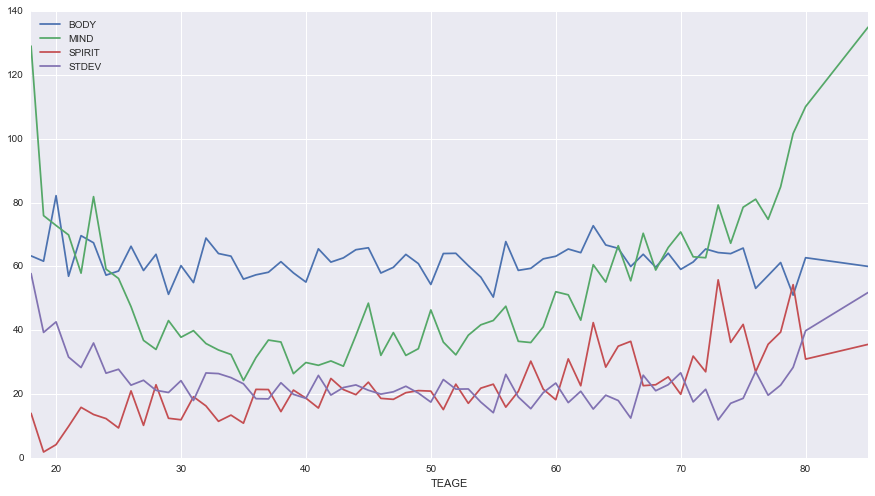

In [807]:
balance_by_age = mind_body_spirit.groupby('TEAGE').mean()
balance_by_age.drop(balance_by_age.columns[0:4], axis=1, inplace=True)
balance_by_age = balance_by_age.drop(balance_by_age.index[:3])
stdev_balance_by_age = balance_by_age.copy()
stdev_balance_by_age['STDEV'] = stdev_balance_by_age.std(axis=1)
stdev_balance_by_age.plot(figsize=(15, 8))

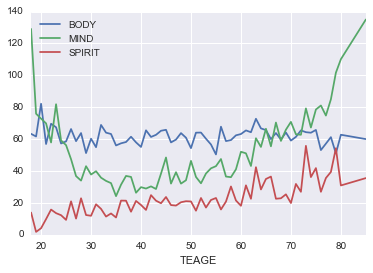

In [808]:
balance_by_age.plot()

## Does having a child change things?

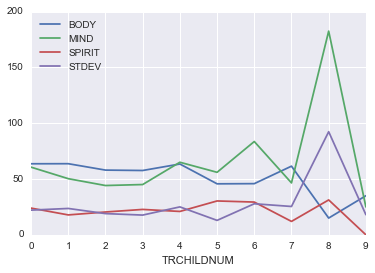

In [809]:
balance_by_children = mind_body_spirit.groupby('TRCHILDNUM').mean()
balance_by_children.drop(balance_by_children.columns[0:4], axis=1, inplace=True)
balance_by_children['STDEV'] = balance_by_children.std(axis=1)
balance_by_children.plot()

### It looks like it only had effect at 8 kids in the household, but also suggests that it was an anomaly as there isn't a trend and relatively few people with 8 children.


## Do the sexes have different MBS balance?

In [810]:
balance_by_sex = mind_body_spirit.copy()
balance_by_sex.drop(['TUCASEID', 'TRCHILDNUM', "PEEDUCA"], axis=1, inplace=True)
balance_by_sex = balance_by_sex[balance_by_sex.TEAGE >= 18]
balance_by_sex.head()


,TEAGE,TESEX,BODY,MIND,SPIRIT
0,20,2,150,0,0
2,65,2,90,120,0
3,50,2,60,350,110
4,23,2,60,0,0
5,85,1,0,60,0


In [811]:
balance_by_sex.sort_values(['TEAGE', 'TESEX'])
balance_by_sex = balance_by_sex.groupby(['TESEX', 'TEAGE']).mean()

In [812]:
std_balance_by_sex = balance_by_sex.copy()
std_balance_by_sex['STDEV'] = balance_by_sex.std(axis=1)
std_balance_by_sex.head()

BODY        MIND     SPIRIT      STDEV
TESEX TEAGE                                             
1     18     57.560000  118.220000  19.800000  49.652039
      19     61.048780   76.000000   1.829268  39.225389
      20     89.866667   50.333333   0.644444  44.707335
      21     50.172414   51.586207   4.655172  26.696879
      22     68.743590   43.666667  29.000000  20.097745

In [813]:
male = balance_by_sex.loc[1]
female = balance_by_sex.loc[2]

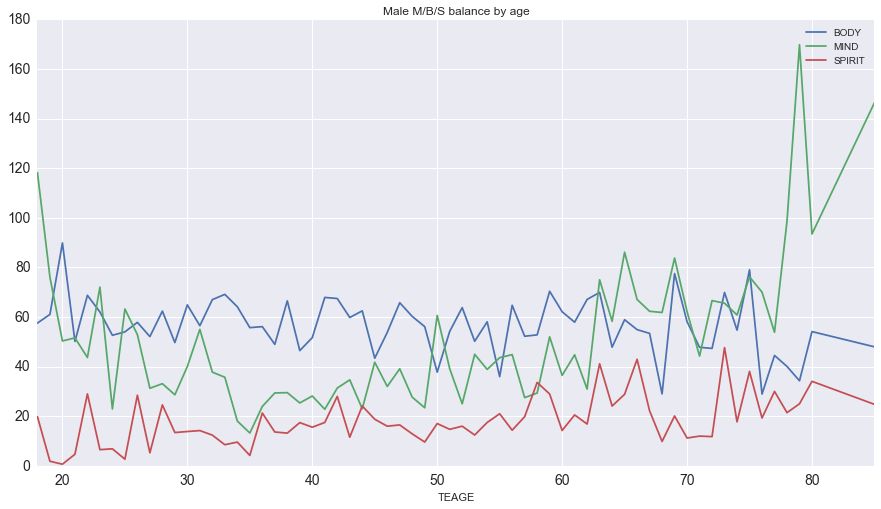

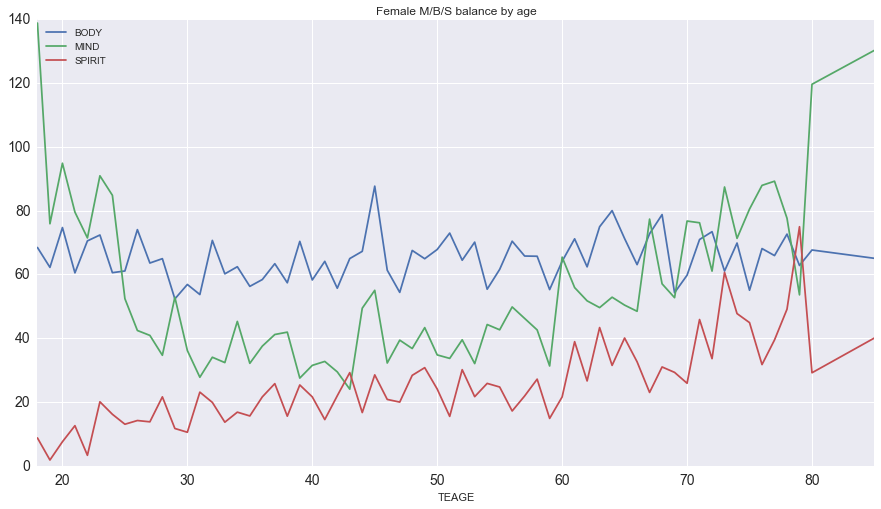

In [814]:

male.plot(title='Male M/B/S balance by age', figsize=(15,8), style=['-','-','-','--'], fontsize=14)
female.plot(title='Female M/B/S balance by age', figsize=(15,8), style=['-','-','-','--'], fontsize=14)


## Does education level effect MBS?

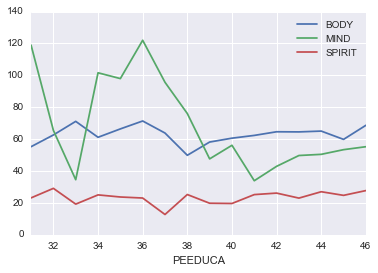

In [815]:
balance_by_edu = mind_body_spirit.groupby('PEEDUCA').mean()
balance_by_edu.drop(balance_by_edu.columns[0:4], axis=1, inplace=True)
balance_by_edu.plot(kind='line')

# Well, that's not getting us anywhere. Let's check out how different age groups compare

In [816]:
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
balance_by_age['AGEGROUP'] = pd.cut(balance_by_age.index, [18, 25, 35, 45, 55, 65, 75, 86], right=False, labels=labels)

balance_by_agegroup = balance_by_age.groupby('AGEGROUP').mean()
stdev_balance_by_agegroup = balance_by_agegroup.copy()
stdev_balance_by_agegroup['STDEV'] = stdev_balance_by_agegroup.std(axis=1)
stdev_balance_by_agegroup

,BODY,MIND,SPIRIT,STDEV
AGEGROUP,,,,
18-24,65.500773,78.116582,10.208339,36.120034
25-34,61.018414,39.724095,14.798624,23.133656
35-44,60.108704,31.167739,18.982595,21.124291
45-54,60.772310,38.130761,20.022925,20.416684
55-64,63.136415,46.637121,25.428862,18.902718
65-74,62.783828,66.043069,31.324039,19.173558
75+,58.733714,95.193326,37.808463,29.040753


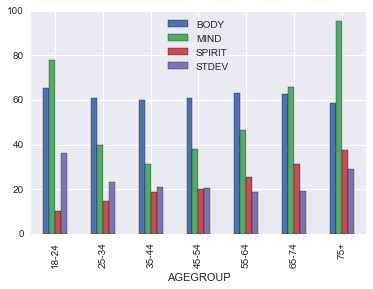

In [817]:
stdev_balance_by_agegroup.plot(kind='bar')

## create_radar takes args of (df, row index numbers (can use list) to show, and size of graph

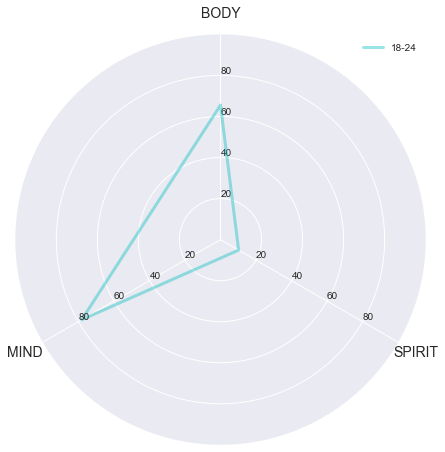

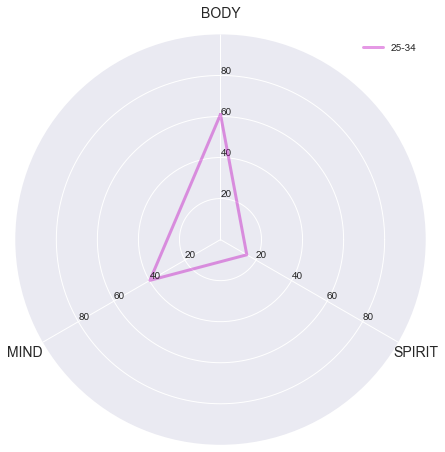

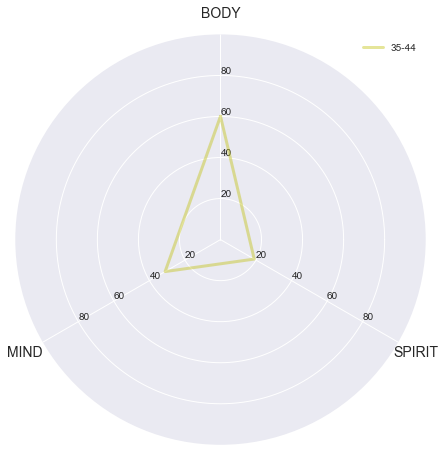

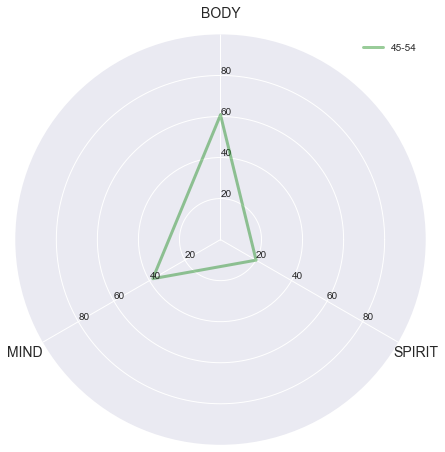

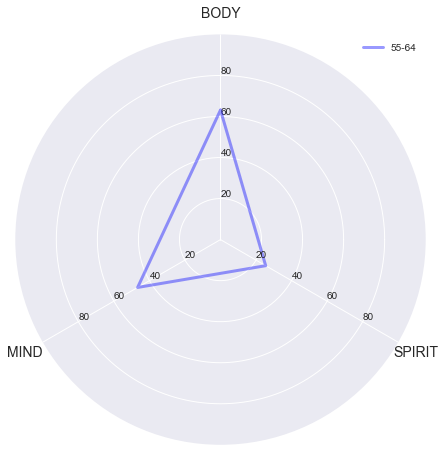

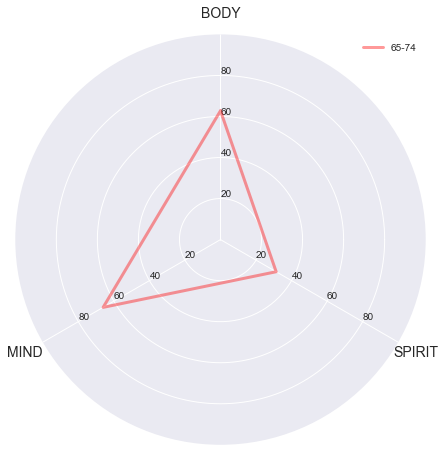

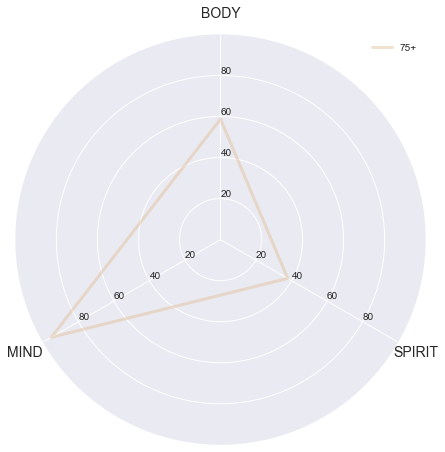

In [818]:
for i in range(len(balance_by_agegroup.index)):
    create_three_point_radar(balance_by_agegroup, [i], 6)

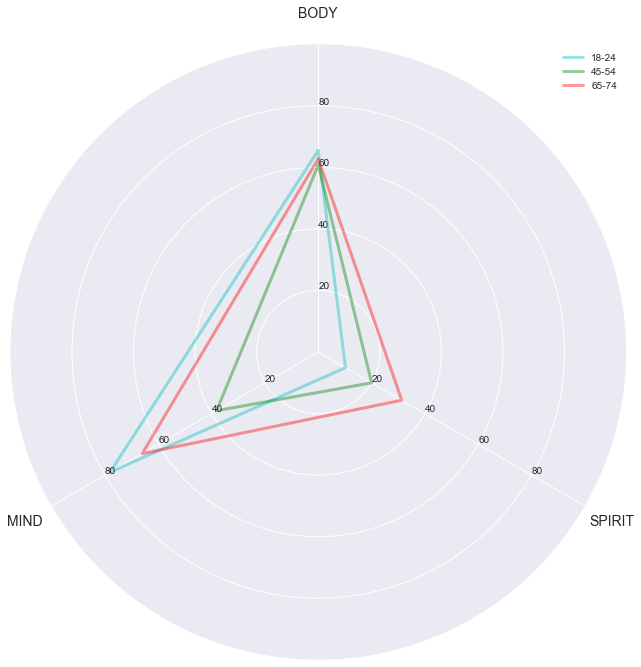

In [819]:
create_three_point_radar(balance_by_agegroup, [0, 3, 5], 9)

## Interest in spiritual activities goes up as we get older. Time spent on our education dips drastically after HS/college and during working age, then picks up again after retirement. Time spent taking care of our bodies varies little as we age - the only surprise from this graph for me. 

## The standard deviation looks at how much of a difference in the time we spend on each activity varies. The lower it is, the more balanced your time is between the three. It is way off as a kid (anyone surprised?), then levels off as we grow up. The jump at the end could be from a stray data point, but does also make sense. It is hard to be elderly in our society. I'll be looking at who spends the most time alone next and have a hypothesis that people over 70 spend much more time alone.